In [1]:
%matplotlib inline
import input_data
import pandas as pd
import matplotlib
matplotlib.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ggplot import *

/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
data = input_data.get_data('20160817')
num_of_cols = data.shape[1] - 1

In [3]:
data.shape[0]

96320

In [4]:
X = data.iloc[:,0:num_of_cols]
Y = data.iloc[:,num_of_cols]

## PCA Analysis

In [5]:
pca_components = 3

In [6]:
pca = PCA(n_components=pca_components)

In [7]:
pca_result = pca.fit_transform(X.values)

In [8]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.31361362  0.15342562  0.12583922]


In [9]:
for i in range(1, 4):
    data['pca%d'%i] = pca_result[:,i-1]

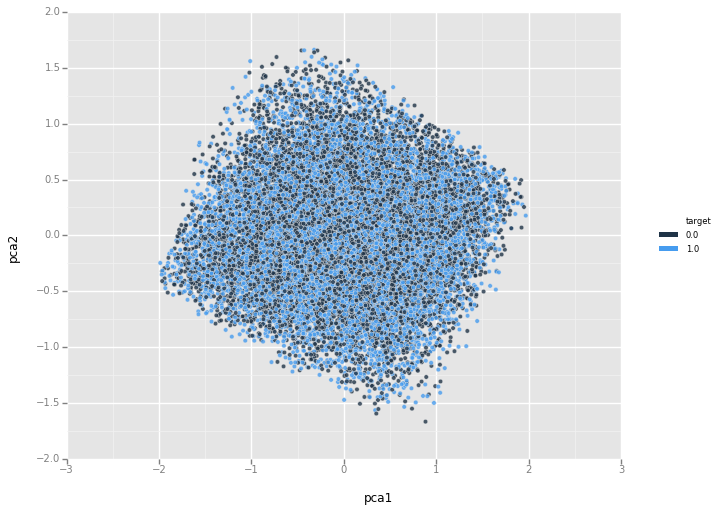

<ggplot: (-9223363283608835275)>

In [15]:
chart = ggplot( data.loc[::5,:], aes(x='pca1', y='pca2', color='target') ) \
        + geom_point(size=20,alpha=0.8)
chart

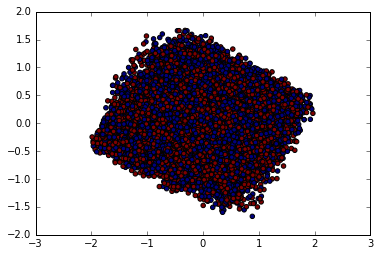

In [10]:
plt.scatter(data.loc[::5, 'pca1'], data.loc[::5, 'pca2'], c=data.loc[::5, 'target'])
plt.show()